# preprocessing


In [1]:
import time
import numpy as np
import wfdb
import ast
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
from scipy.fftpack import fft, ifft 
from scipy import signal

In [21]:
path = './ptb-xl/'
sampling_rate = 100

In [33]:
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [34]:
len(Y)

21801

In [35]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [36]:
X = load_raw_data(Y, sampling_rate, path)

In [25]:
X.shape

(21801, 1000, 12)

In [38]:
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)

In [28]:
agg_df

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
...,...,...,...,...,...,...,...,...,...,...,...,...
BIGU,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,1.0,NaN,NaN,Statements related to ectopic rhythm abnormali...,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,NaN,NaN
AFLT,atrial flutter,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial flutter,51.0,MDC_ECG_RHY_ATR_FLUT,NaN,NaN
SVTAC,supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular tachycardia,55.0,MDC_ECG_RHY_SV_TACHY,NaN,D3-31290
PSVT,paroxysmal supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,paroxysmal supraventricular tachycardia,NaN,MDC_ECG_RHY_SV_TACHY_PAROX,NaN,NaN


In [39]:
agg_df = agg_df[agg_df.diagnostic == 1]

In [40]:
def agg(y_dic):
    temp =[]
    
    for key in y_dic.keys():
        if key in agg_df.index:
            c = agg_df.loc[key].diagnostic_class
            if str(c) != 'nan':
                temp.append(c)
    return list(set(temp))

In [41]:
Y['diagnostic_superclass'] = Y.scp_codes.apply(agg)
Y['superdiagnostic_len'] = Y['diagnostic_superclass'].apply(lambda x: len(x))

In [42]:
Y

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,ST-ELEV-MI,ST-DEPR-MI,Q-ISC,Q-ISC-QPeak,Q-ISC-V2V3,Q-ISC-RPeak,STRAIN,MI-ALL,diagnostic_superclass,superdiagnostic_len
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,False,False,False,False,False,False,False,False,[NORM],1
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,False,False,False,False,False,False,False,False,[NORM],1
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],1
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],1
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,False,True,False,False,False,False,False,True,[STTC],1
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,False,False,False,False,False,False,False,False,[NORM],1
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,False,False,False,False,False,False,False,False,[STTC],1


In [43]:
counts = pd.Series(np.concatenate(Y.diagnostic_superclass.values)).value_counts()
Y['diagnostic_superclass'] = Y['diagnostic_superclass'].apply(lambda x: list(set(x).intersection(set(counts.index.values))))

In [44]:
data = np.array([wfdb.rdsamp(path+f)[0] for f in Y.filename_lr])

In [46]:
Y

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,ST-ELEV-MI,ST-DEPR-MI,Q-ISC,Q-ISC-QPeak,Q-ISC-V2V3,Q-ISC-RPeak,STRAIN,MI-ALL,diagnostic_superclass,superdiagnostic_len
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,False,False,False,False,False,False,False,False,[NORM],1
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,False,False,False,False,False,False,False,False,[NORM],1
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],1
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],1
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,False,True,False,False,False,False,False,True,[STTC],1
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,False,False,False,False,False,False,False,False,[NORM],1
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,False,False,False,False,False,False,False,False,[STTC],1


In [47]:
len(data)

21801

In [48]:
X_data = data[Y['superdiagnostic_len'] >= 1]
Y_data = Y[Y['superdiagnostic_len'] >= 1]

In [49]:
Y=Y_data
X=X_data

In [50]:
X.shape

(21396, 1000, 12)

In [51]:
Y.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'r_peaks', 'RS-LVH', 'S12-LVH', 'R56-LVH', 'QRS-LVH', 'LI-LVH',
       'SLI-LVH', 'QRS-CLBB', 'ST-ELEV-MI', 'ST-DEPR-MI', 'Q-ISC',
       'Q-ISC-QPeak', 'Q-ISC-V2V3', 'Q-ISC-RPeak', 'STRAIN', 'MI-ALL',
       'diagnostic_superclass', 'superdiagnostic_len'],
      dtype='object')

## plot raw data

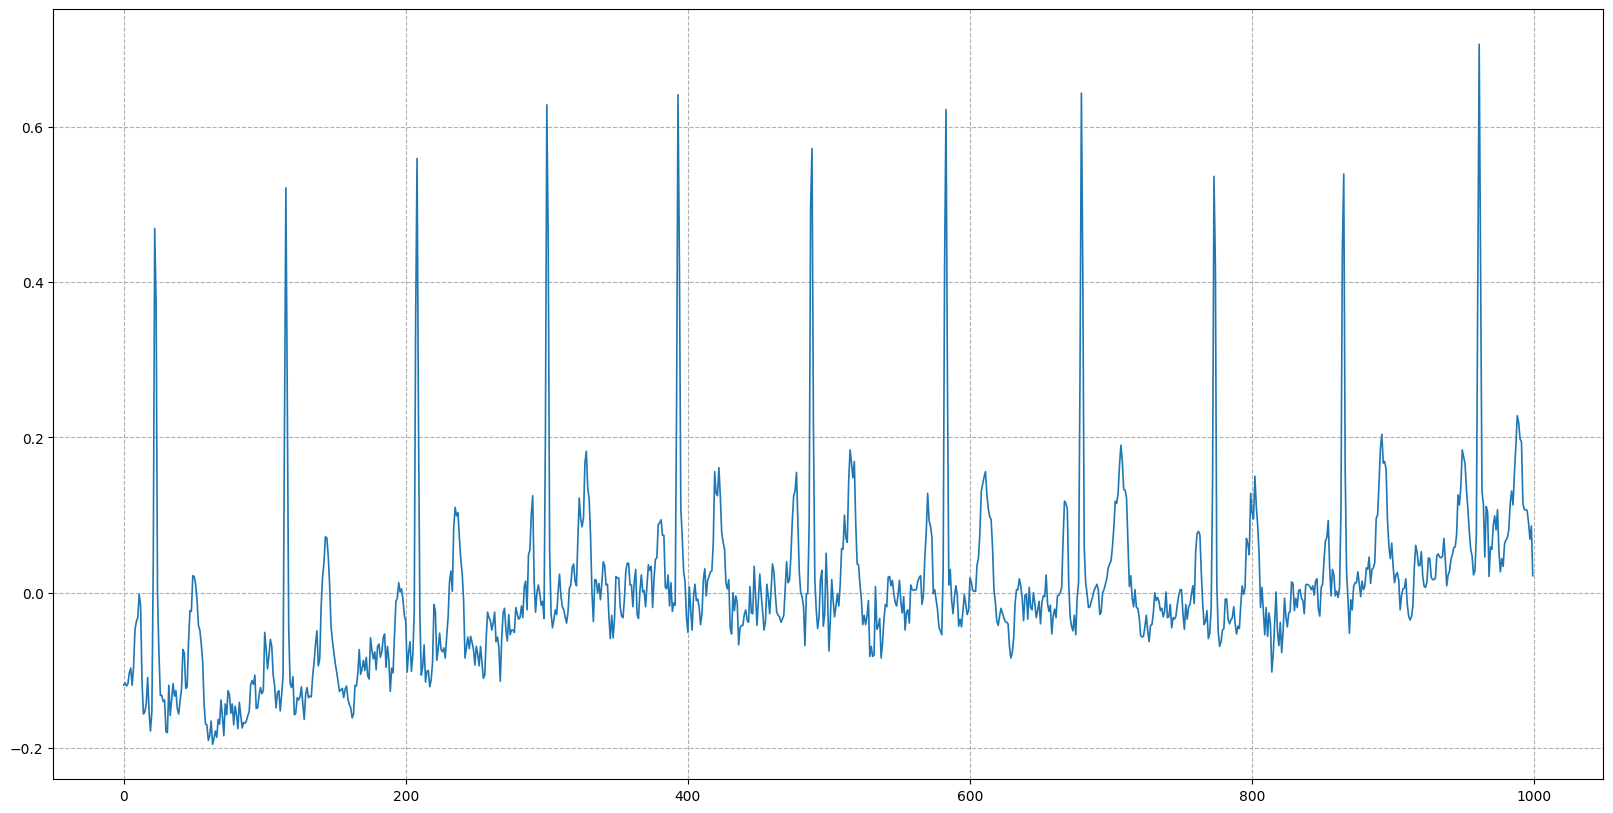

In [52]:
plt.rcParams['figure.figsize'] = (20.0, 10.0) 
plt.figure()
plt.plot(X[0][:,0], linewidth=1.2)
plt.grid(linestyle='--')
# plt.yticks([])
plt.show()

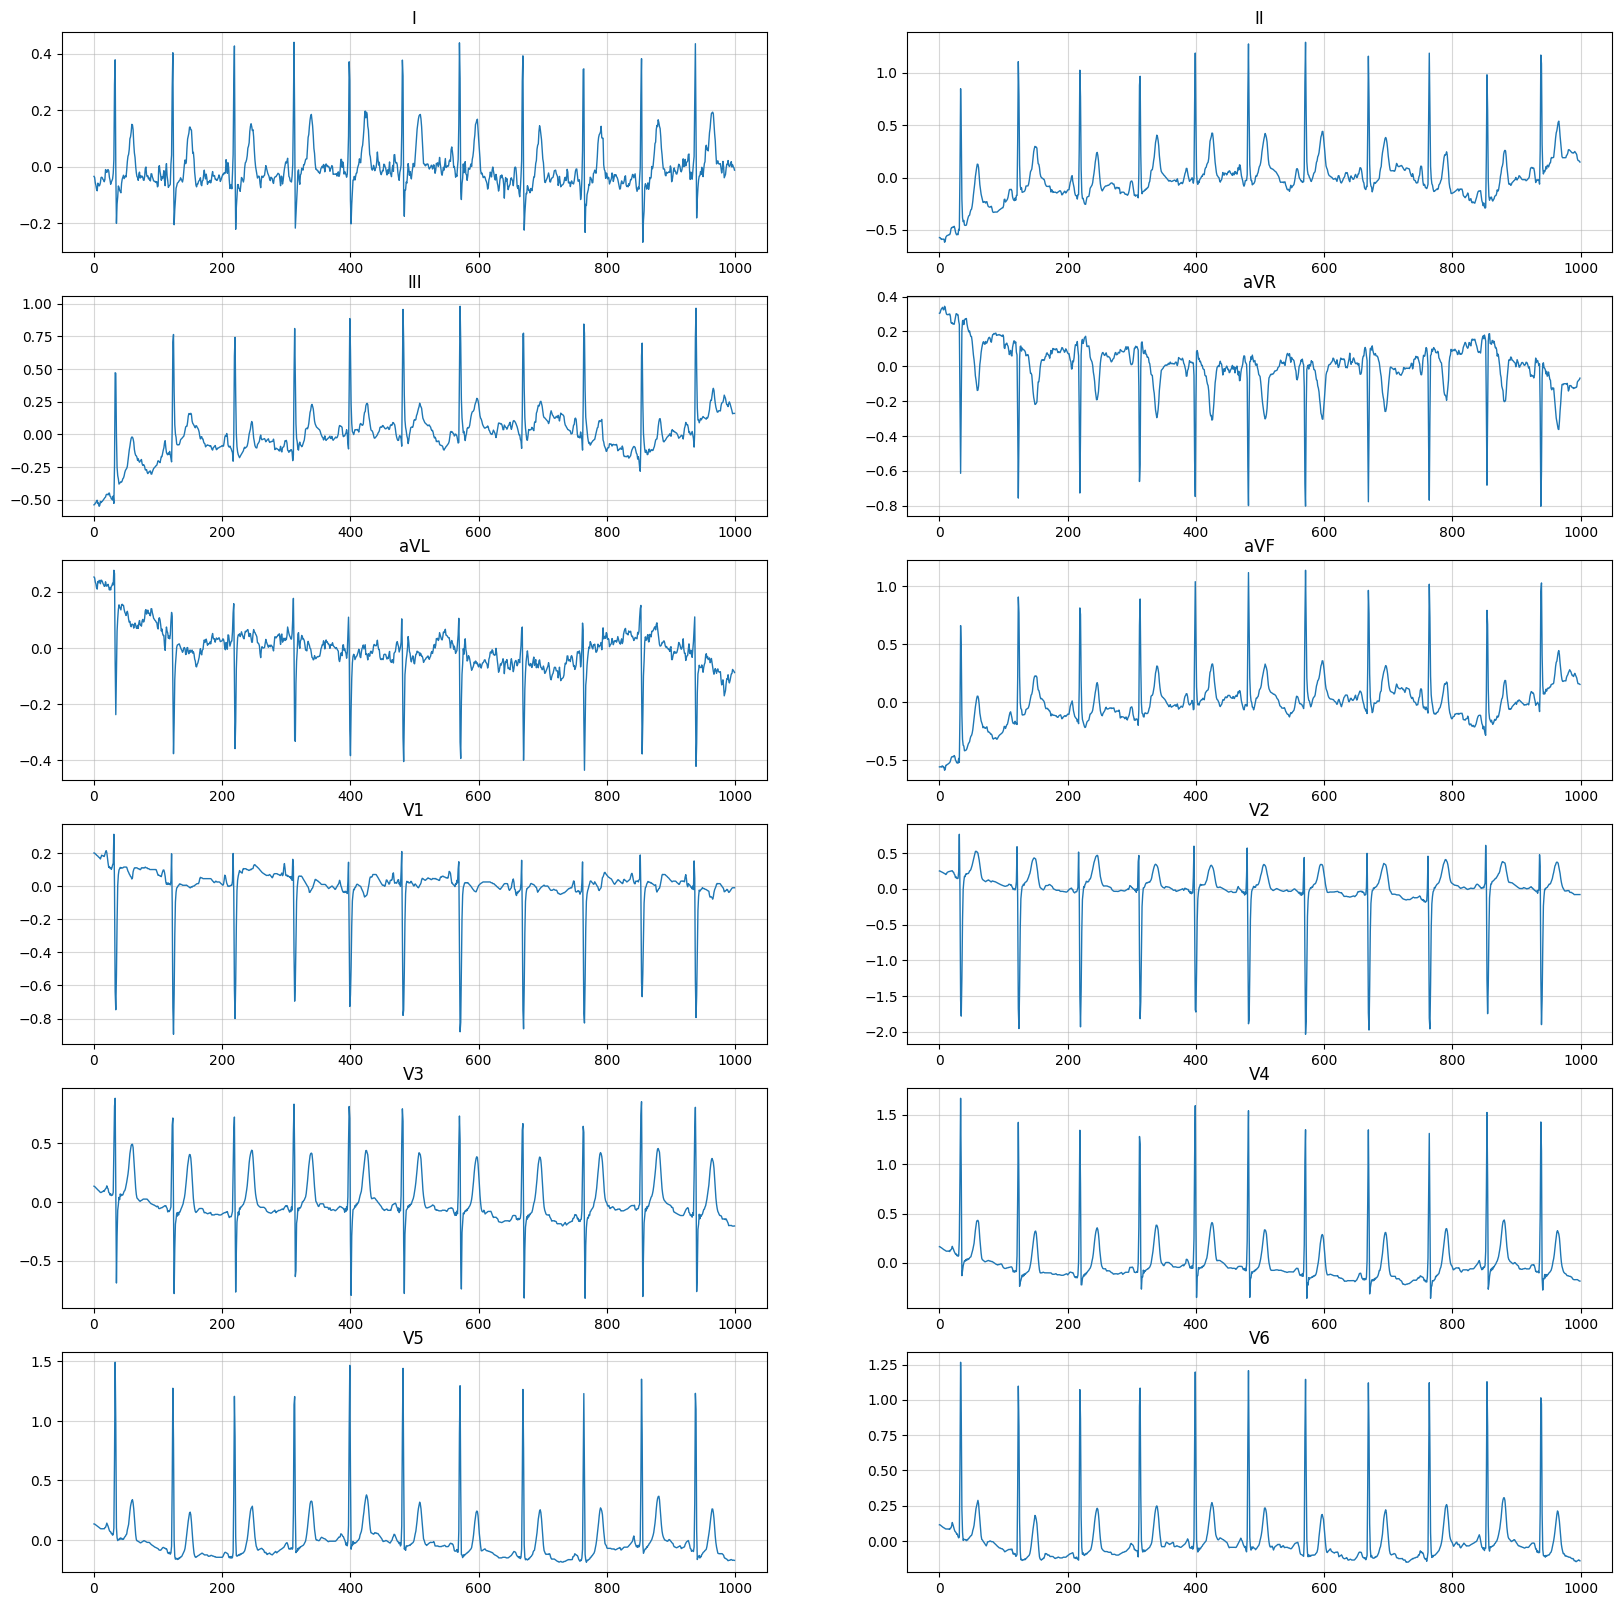

In [53]:
ecg = X[4]
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (0.1,0.1)
plt.figure()
for index in range(12):
    plt.subplot(6,2,index+1)
    plt.plot(ecg[:,index], linewidth=1)
    
    # plt.yticks(np.arange(np.min(ecg[:,index]), np.max(ecg[:,index]), 0.1))
    plt.gca()
    plt.title(titles[index])
    #plt.axis('off')
    plt.axis('on')

plt.show()

In [54]:
def np_move_avg(a,n,mode="same"):
    return(np.convolve(a, np.ones((n,))/n, mode=mode))

In [55]:
#ecg_original = X[40][:,0]
ecg_original = X[100][:,0]
ecg_filtered = np_move_avg(ecg_original, 5)

In [56]:
def ecg_fft_ana(ecg_original, sampling_rate):
    fs = sampling_rate
    ts = 1.0/fs
    t = np.arange(0, 1, ts)
    n = len(ecg_original)
    k = np.arange(n)
    t = n/fs
    frq = k/t
    frq = frq[range(int(n/2))]
    fft_ecg = np.abs(fft(ecg_original))[range(int(n/2))]
    return frq, fft_ecg

In [57]:
def show_spec_dif(ecg_original, ecg_filtered, title1="title1", title2 = "title2"):
    frq, fft_ecg = ecg_fft_ana(ecg_original, sampling_rate)
    frq_filtered, fft_ecg_filtered = ecg_fft_ana(ecg_filtered, sampling_rate)
    plt.figure()
    plt.subplot(221)
    plt.plot(ecg_original[:500])
    plt.title(title1)
    plt.subplot(222)
    plt.plot(frq,fft_ecg)
    plt.title(title1 + '`s spectrum')
    plt.subplot(223)
    plt.plot(ecg_filtered[:500])
    plt.title(title2)
    plt.subplot(224)
    plt.plot(frq_filtered, fft_ecg_filtered)
    plt.title(title2 + '`s spectrum')
    plt.show()

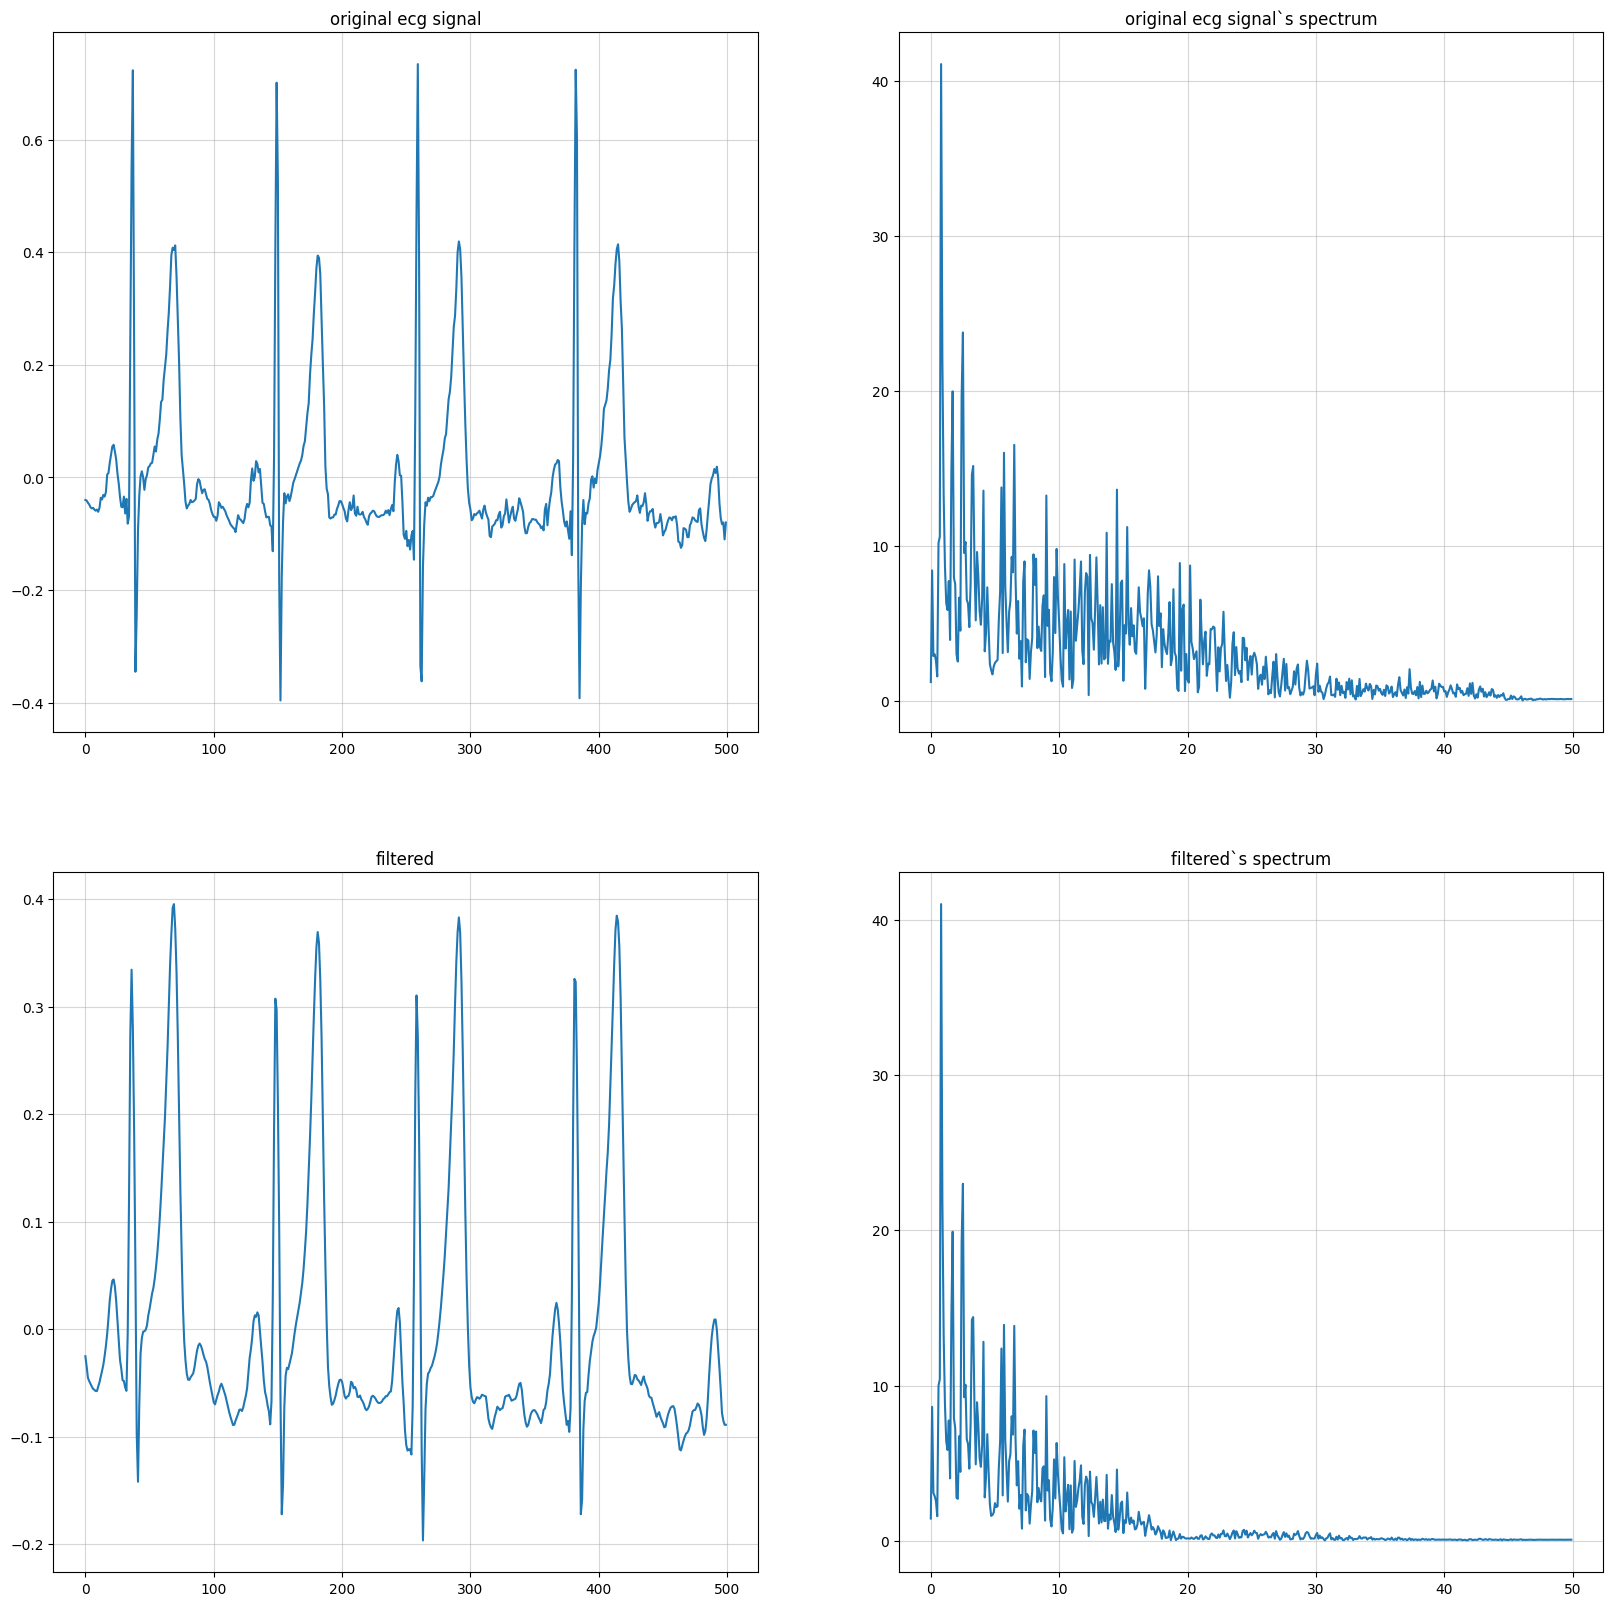

In [58]:
show_spec_dif(ecg_original, ecg_filtered, 'original ecg signal', 'filtered')

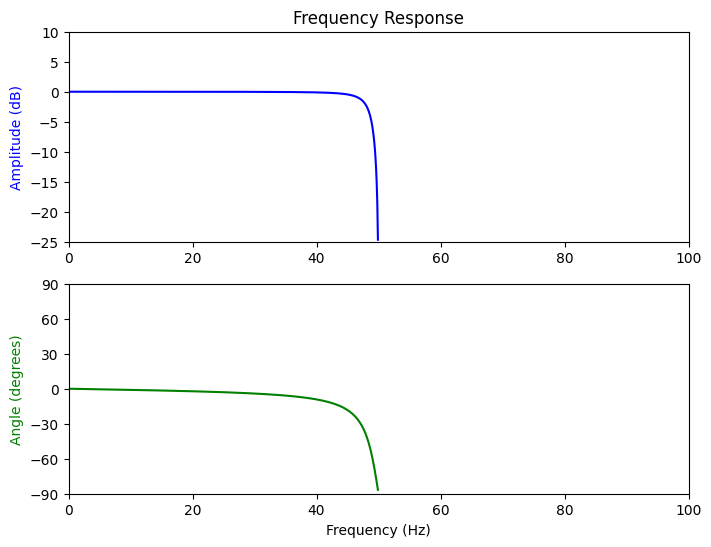

In [59]:
fs = sampling_rate  
f0 = 50.0   
Q = 30.0    
b, a = signal.iirnotch(f0, Q, fs)
freq, h = signal.freqz(b, a, fs=fs)
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].set_xlim([0, 100])
ax[0].set_ylim([-25, 10])
ax[0].grid()
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0, 100])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid()
plt.show()

In [60]:
ecg_notch = signal.filtfilt(b, a, ecg_filtered)

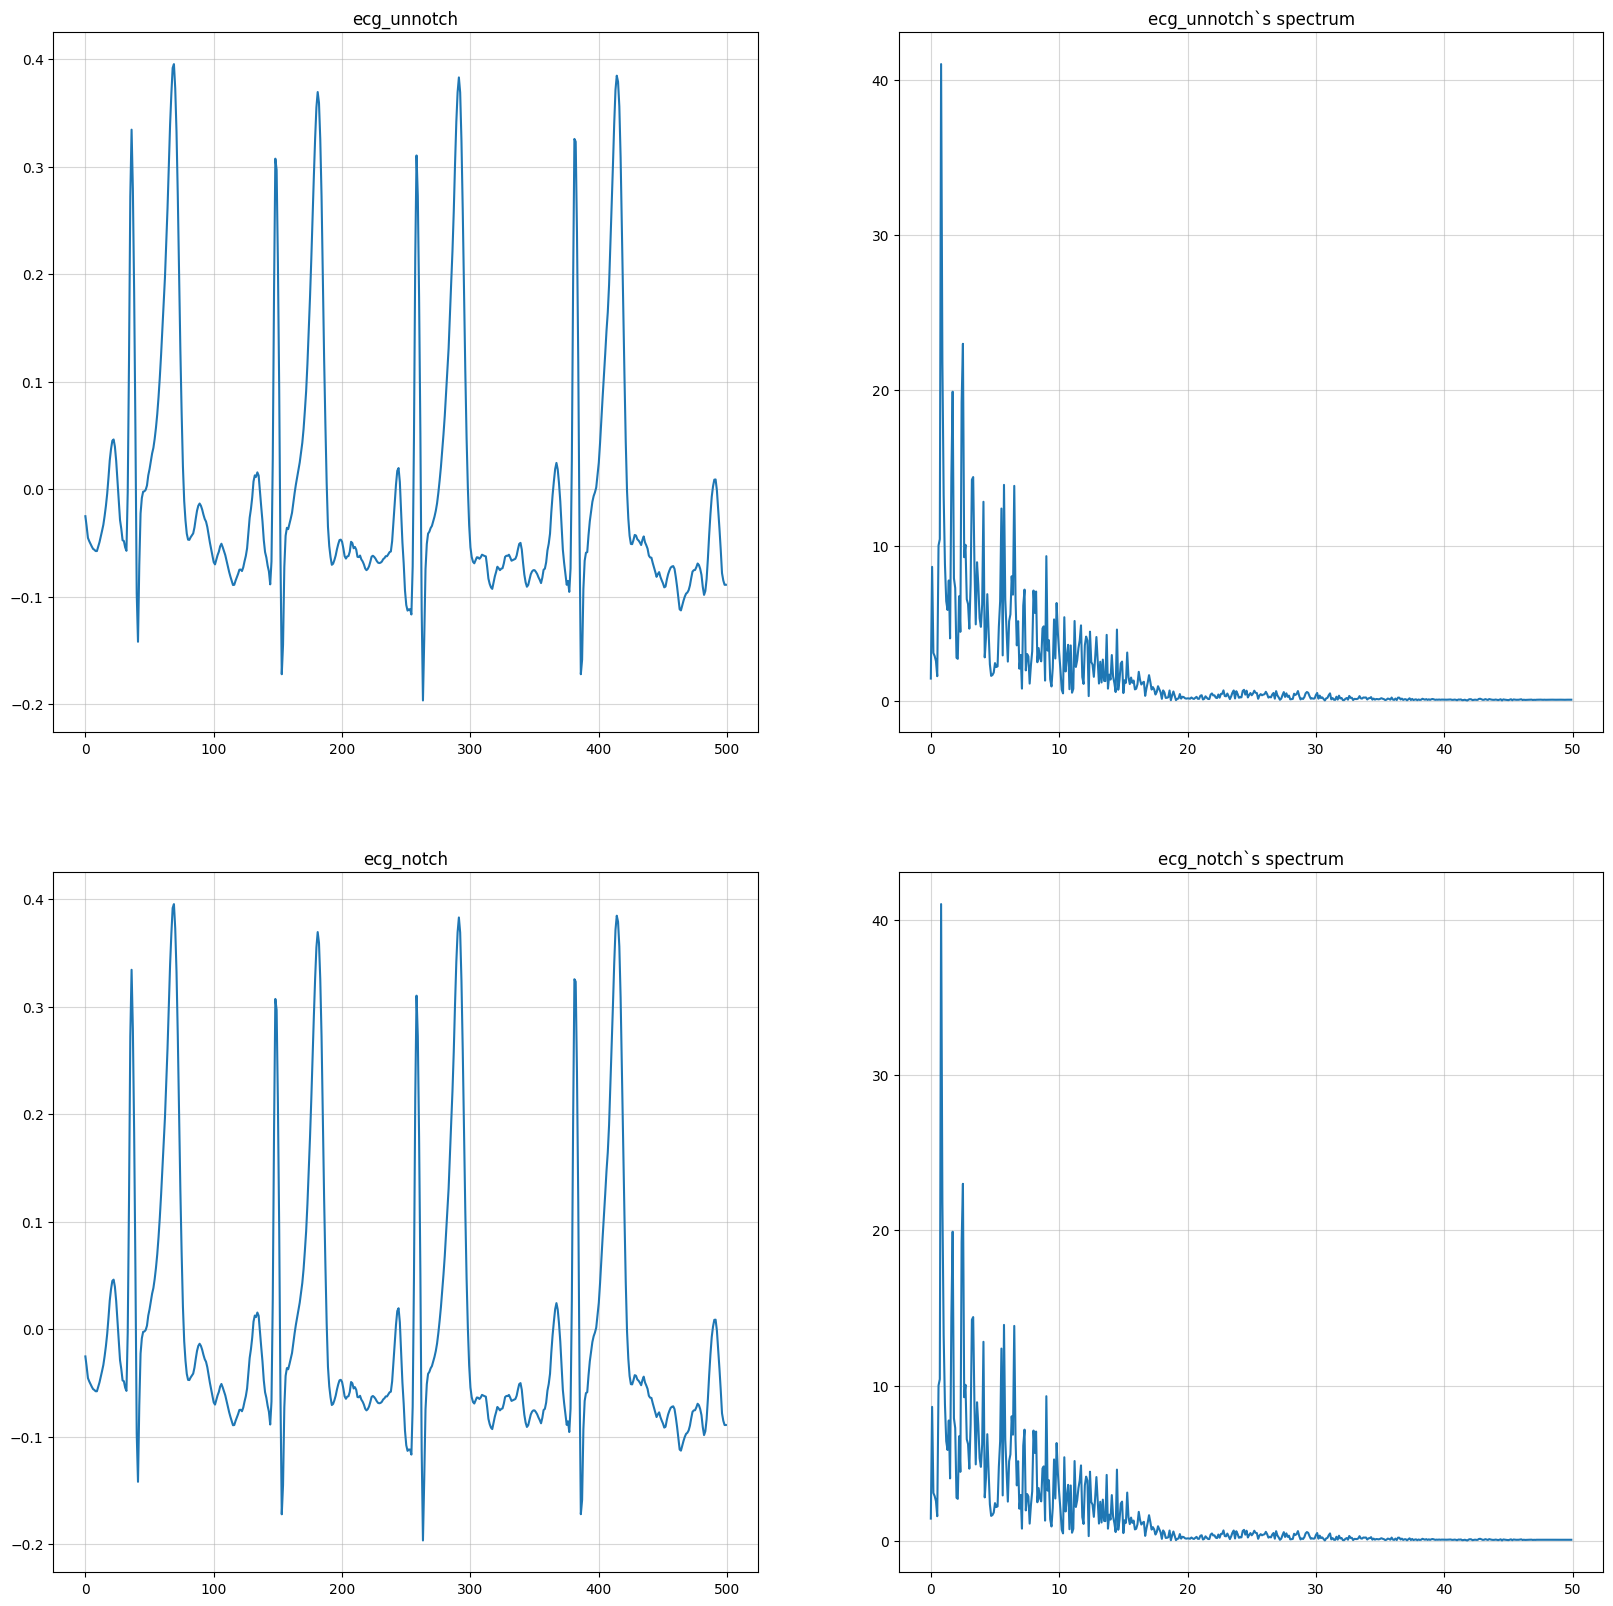

In [61]:
show_spec_dif(ecg_filtered, ecg_notch, "ecg_unnotch", "ecg_notch")

In [62]:


channels = 12
for index in range(len(X)):
    for channel in range(channels):
        X[index][:, channel] = np_move_avg(X[index][:, channel], 5)



In [63]:
X.shape

(21396, 1000, 12)

In [64]:


X_new=X

In [65]:
X_new.shape

(21396, 1000, 12)

In [66]:
X=X_new

In [67]:
X.shape

(21396, 1000, 12)

In [68]:
ecg_rhythms=X

In [69]:
ecg_rhythms.shape

(21396, 1000, 12)

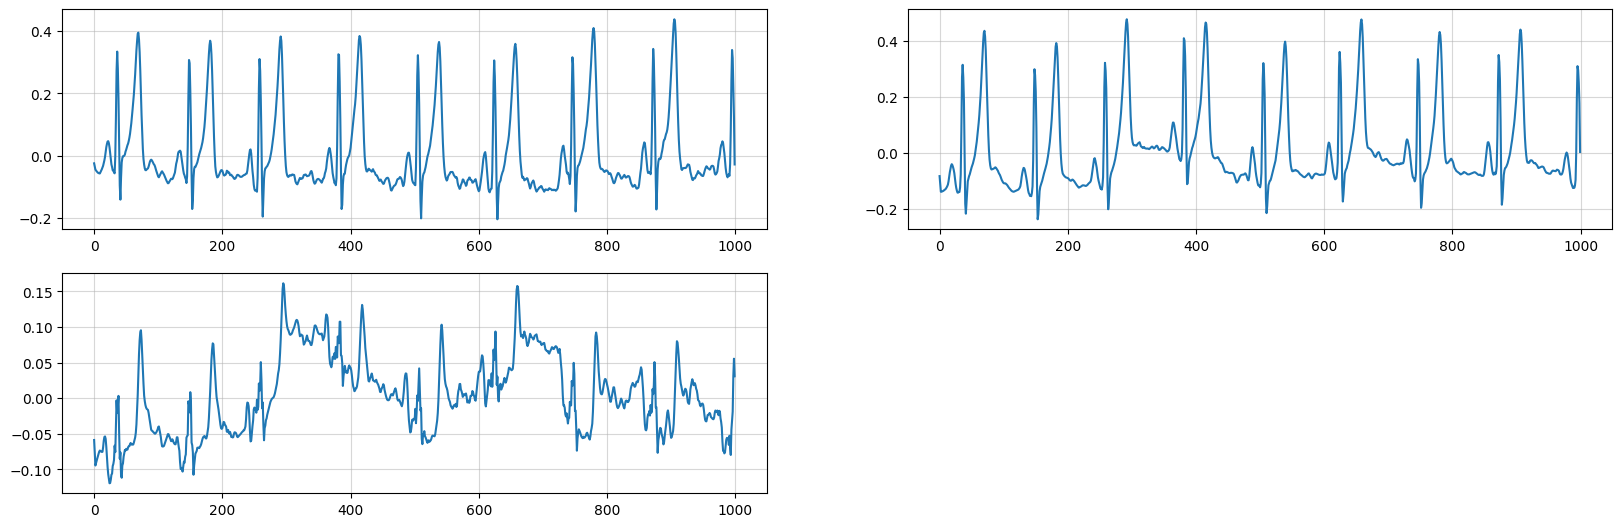

In [70]:
plt.figure()
for i in range(3):
    plt.subplot(6, 2, i+1)
    #plt.plot(ecg_rhythms[40,:,i])
    plt.plot(ecg_rhythms[100,:,i])
plt.show()

In [71]:
false_count = 0
Y['Runconfirmed'] = 0
for index in range(len(ecg_rhythms)):
    if ecg_rhythms[index].any() == np.zeros([1000, 3]).any():
        false_count += 1
        Y['Runconfirmed'][index] = 1
false_count

/var/folders/70/s03t_xm53wq9db1vxd6l5d8c0000gn/T/ipykernel_6892/3112596484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Runconfirmed'] = 0


0

## Split data

In [72]:
X_all = ecg_rhythms[(Y.Runconfirmed !=1)]
y_all = Y[(Y.Runconfirmed !=1)].diagnostic_superclass

In [73]:
X_all.shape

(21396, 1000, 12)

In [77]:
y_report_all = Y[(Y.Runconfirmed !=1)].report

In [74]:
y_all.shape

(21396,)

In [75]:
save_path = './processed/'
np.save('X_all.npy', X_all)
np.save('y_all.npy', np.array(y_all))

In [79]:
np.save('y_report_all', np.array(y_report_all))

In [80]:
X_all

array([[[-7.100e-02, -3.000e-02,  4.100e-02, ..., -1.700e-02,
         -2.040e-02, -4.440e-02],
        [-9.440e-02, -3.760e-02,  5.700e-02, ..., -2.160e-02,
         -2.480e-02, -5.720e-02],
        [-1.150e-01, -4.380e-02,  7.140e-02, ..., -2.540e-02,
         -2.840e-02, -6.880e-02],
        ...,
        [ 7.460e-02,  4.400e-03, -7.020e-02, ...,  8.040e-02,
         -3.660e-02, -5.160e-02],
        [ 5.340e-02, -1.200e-03, -5.460e-02, ...,  7.640e-02,
         -3.160e-02, -5.680e-02],
        [ 3.540e-02, -5.400e-03, -4.080e-02, ...,  8.180e-02,
         -2.440e-02, -5.520e-02]],

       [[-1.380e-02,  6.920e-02,  8.300e-02, ...,  9.100e-02,
          3.060e-02,  3.460e-02],
        [-2.500e-02,  8.700e-02,  1.120e-01, ...,  1.086e-01,
          2.940e-02,  3.500e-02],
        [-3.740e-02,  1.036e-01,  1.410e-01, ...,  1.254e-01,
          2.780e-02,  3.480e-02],
        ...,
        [ 6.340e-02,  4.984e-01,  4.350e-01, ...,  1.032e-01,
          2.538e-01,  3.234e-01],
        [-4.